# The Office Text Generator

## Introduction
This notebook is for a school project on software development at KEA - Copenhagen school of design nd tecnology.

### Data Preparation


In [1]:
import pandas as pd
import os
import re

In [2]:
directory = os.getcwd()
data = pd.read_excel(directory + '/the-office-lines.xlsx')
df =  pd.DataFrame(data, columns=['speaker', 'line_text'])

df.head()

,speaker,line_text
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."


In [3]:
mkdir Transcripts

In [4]:
characters = ['Andy', 'Dwight', 'Jim', 'Michael', 'Pam']

for index, row in df.iterrows():
    if row['speaker'] in characters:
        speaker = row['speaker']
        with open('Transcripts/%s_transcript' %speaker + '.txt', 'a') as f:
            f.write(str(row['line_text']))
print('Transcripts extracted from excel file')

Transcripts extracted from excel file


#### Separating Lines and Actions

In [5]:
import pickle

In [6]:
mkdir Lines

In [7]:
mkdir Actions

In [8]:
for character in characters:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for lines in all_lines:
        line = re.sub(r'\[.*?\]', '', lines)
        action = re.findall(r'\[.*?\]', lines)
        if not len(line) == 0:
            with open('Lines/%s_lines' %character + '.txt', 'wb') as f_line:
                pickle.dump(str(line), f_line)
        if not len(action) == 0:
            with open('Actions/%s_actions' %character + '.txt', 'wb') as f_action:
                pickle.dump(str(action), f_action)

#### Loading the pickeled actions and line

In [9]:
actions = {}
lines = {}
for i, char in enumerate(characters):
    with open('Actions/%s_actions' %char + ".txt", "rb") as file:
        actions[char] = pickle.load(file)
    with open('Lines/%s_lines' %char + ".txt", "rb") as file:
        lines[char] = pickle.load(file)

In [10]:
actions.keys()

dict_keys(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'])

In [11]:
lines.keys()

dict_keys(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'])

### Data Cleaning

##### Combine fuction

In [12]:
import string

In [13]:
# combine
def combine_text(list_of_text):
    combined_text = "".join(list_of_text)
    return combined_text

In [14]:
actions_combined = {key: [combine_text(value)] for (key, value) in actions.items()}

In [15]:
lines_combined = {key: [combine_text(value)] for (key, value) in lines.items()}

#### DataFram

In [16]:
pd.set_option('max_colwidth',150)

actions_df = pd.DataFrame.from_dict(actions_combined).transpose()
actions_df.columns = ['actions']
actions_df = actions_df.sort_index()
actions_df

,actions
Andy,"['[Robert smiles as Andy exits]', '[Shoves Creed with his foot, Creed grunts]', '[To Oscar]', '[to Robert California]', '[laughs]', '[sips]', '[Ji..."
Dwight,"['[singing]', '[Imitates heavy drumming]', '[Imitates heavy drumming]', '[points to Ryan]', '[new take]', '[does a martial arts move with his hand..."
Jim,"['[crosses fingers]', '[Dwight begins smashing pencils with his phone]', '[scratches head]', '[Car horn honking]', '[looks at camera]', '[Shedder ..."
Michael,"['[on the phone]', '[quick cut scene]', '[hangs up]', '[Clears throat]', '[growls]', ""[shows the camera his WORLD'S BEST BOSS mug]"", '[Strains, gr..."
Pam,"['[Laughs]', '[Laughing]', '[stirs]', '[nods toward camera]', '[laughs]', '[on phone]', '[Dwight laughs]', '[whispering]', '[on her cell phone]', ..."


In [17]:
# pandas dataframe
pd.set_option('max_colwidth',150)

lines_df = pd.DataFrame.from_dict(lines_combined).transpose()
lines_df.columns = ['lines']
lines_df = lines_df.sort_index()
lines_df

,lines
Andy,"Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif..."
Dwight,Shall I play for you? Pa rum pump um pum I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...
Jim,"Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti..."
Michael,All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...
Pam,"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet...."


#### Cleaning actions fuction
First round

In [18]:
# cleaing technique round 1
def clean_first_round(text):
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
      
    return text

first_round = lambda x: clean_first_round(x)

In [19]:
actions_clean = pd.DataFrame(actions_df.actions.apply(first_round))

In [20]:
lines_clean = pd.DataFrame(lines_df.lines.apply(first_round))

second round

In [21]:
def clean_actions_round2(text):
    text = re.sub("[,]", '', text)
    text = re.sub('["]', '', text)
    
    return text

actions_round2 = lambda x: clean_actions_round2(x)

In [22]:
actions_clean = pd.DataFrame(actions_clean.actions.apply(actions_round2))

In [23]:
# cleaing technique round 2
def clean_lines_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
   
    return text

lines_round2 = lambda x: clean_lines_round2(x)

In [24]:
lines_clean = pd.DataFrame(lines_clean.lines.apply(lines_round2))

In [25]:
mkdir pickle

In [26]:
lines_clean.to_pickle("pickle/lines_clean.pkl")

In [27]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):
    text = porter.stem(text) 
    return text
stemming_round = lambda x: stemming(x)

In [28]:
lines_clean['unstemd'] = lines_clean['lines']

In [29]:
lines_clean['unstemd'] = lines_clean['unstemd'].str.split()


In [30]:
lines_clean['stemd'] = lines_clean['unstemd'].apply(lambda x: [stemmer.stem(y) for y in x])
lines_clean = lines_clean.drop(columns=['unstemd'])
lines_clean = lines_clean.drop(columns=['lines'])


In [31]:
# combine
def combine_stemd_text(list_of_text):
    combined_text = " ".join(list_of_text)
    return combined_text

In [32]:
line_combined = {key: combine_stemd_text(value) for (key, value) in lines_clean.stemd.items()}
lines_clean['lines'] = line_combined.values()
lines_clean = lines_clean.drop(columns=['stemd'])
lines_clean

,lines
Andy,robert i said winner and loser is that what your talk about oh that it might that might actual be what im think of can you clarifi that no no no i...
Dwight,shall i play for you pa rum pump um pum i have no gift for you pa rum pump um pum whassup whassup what just clear my desk i cant concentr it overl...
Jim,oh i told you i couldnt close it so actual you call me in here but yeah my job is to speak to client on the phone about uh quantiti and type of co...
Michael,all right jim your quarter look veri good how are thing at the librari so youv come to the master for guidanc is this what your say grasshopp all ...
Pam,well i dont know what uh yeah just a fax you havent told me uh yeah the one you put in the garbag can that was a special file cabinet i have an im...


#### Orginize Lines Data
Corpus lines


In [33]:
char_names = ['Andy Bernard', 'Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly']
lines_clean['Characters'] = char_names
lines_clean

,lines,Characters
Andy,robert i said winner and loser is that what your talk about oh that it might that might actual be what im think of can you clarifi that no no no i...,Andy Bernard
Dwight,shall i play for you pa rum pump um pum i have no gift for you pa rum pump um pum whassup whassup what just clear my desk i cant concentr it overl...,Dwight Schrute
Jim,oh i told you i couldnt close it so actual you call me in here but yeah my job is to speak to client on the phone about uh quantiti and type of co...,Jim Halpert
Michael,all right jim your quarter look veri good how are thing at the librari so youv come to the master for guidanc is this what your say grasshopp all ...,Michael Scott
Pam,well i dont know what uh yeah just a fax you havent told me uh yeah the one you put in the garbag can that was a special file cabinet i have an im...,Pam Beesly


> SKAL VI BRUGE DET CLEANET DATA?? HVORFOR CLEANER VI DET SÅ HVIS NEJ?

In [34]:
lines_df.to_pickle("pickle/lines_corpus.pkl")

#### Document-Term Matrix

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
lines_cv = cv.fit_transform(lines_clean.lines)                      
lines_dtm = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_dtm.index = lines_clean.index
lines_dtm

,aa,aaaaaaaa,aaaaaand,aaaaah,aaaaeeexcel,aaaagh,aaaah,aaaahh,aaaahhh,aaaall,...,zip,zipadeedoodaah,zit,zombi,zone,zoo,zoom,zoppiti,zoran,zuckerberg
Andy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Dwight,1,6,0,1,0,1,2,0,0,0,...,2,0,1,4,4,3,0,0,1,1
Jim,0,0,0,0,0,0,0,0,0,0,...,1,1,0,3,1,0,0,0,0,0
Michael,0,2,1,0,1,0,1,2,1,1,...,1,0,2,1,12,1,6,2,0,0
Pam,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
lines_dtm.keys()

Index(['aa', 'aaaaaaaa', 'aaaaaand', 'aaaaah', 'aaaaeeexcel', 'aaaagh',
       'aaaah', 'aaaahh', 'aaaahhh', 'aaaall',
       ...
       'zip', 'zipadeedoodaah', 'zit', 'zombi', 'zone', 'zoo', 'zoom',
       'zoppiti', 'zoran', 'zuckerberg'],
      dtype='object', length=10940)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
actions_cv = cv.fit_transform(actions_clean.actions)
actions_dtm = pd.DataFrame(actions_cv.toarray(), columns=cv.get_feature_names())
actions_dtm.index = actions_clean.index
actions_dtm

,aback,abby,abruptly,absolutely,accent,accepts,accidentally,account,accountants,accounting,...,youre,youtube,yuck,zeke,zipper,zipping,zips,zone,zooms,zwarte
Andy,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Dwight,0,2,1,0,9,0,1,1,1,0,...,3,0,0,1,1,0,0,0,1,1
Jim,0,3,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Michael,1,1,0,1,20,1,1,0,0,0,...,0,2,1,0,1,1,2,1,3,0
Pam,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
lines_dtm.to_pickle("pickle/lines_dtm.pkl")
actions_dtm.to_pickle("pickle/actions_dtm.pkl")

## Exploratory Data Analysis

In [40]:
#lines = pd.read_pickle('pickle/lines_dtm.pkl')
lines = lines_dtm
lines = lines.transpose()
lines.head()

,Andy,Dwight,Jim,Michael,Pam
aa,0,1,0,0,0
aaaaaaaa,0,6,0,2,0
aaaaaand,0,0,0,1,0
aaaaah,0,1,0,0,0
aaaaeeexcel,0,0,0,1,0


In [41]:
actions = actions_dtm
actions = actions.transpose()

### Most Common Word

In [42]:
top_dict = {}
for c in lines.columns:
    top = lines[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Andy': [('just', 200),
  ('im', 190),
  ('know', 152),
  ('like', 126),
  ('yeah', 123),
  ('right', 111),
  ('dont', 104),
  ('guy', 102),
  ('want', 91),
  ('oh', 91),
  ('got', 75),
  ('hey', 74),
  ('say', 74),
  ('think', 73),
  ('come', 67),
  ('realli', 67),
  ('good', 63),
  ('time', 63),
  ('gonna', 62),
  ('thank', 61),
  ('need', 60),
  ('mean', 59),
  ('uh', 57),
  ('thing', 53),
  ('did', 53),
  ('erin', 53),
  ('work', 52),
  ('great', 51),
  ('look', 49),
  ('ok', 49)],
 'Dwight': [('im', 492),
  ('oh', 475),
  ('know', 436),
  ('dont', 402),
  ('just', 396),
  ('okay', 350),
  ('like', 343),
  ('jim', 336),
  ('michael', 323),
  ('come', 292),
  ('right', 277),
  ('let', 261),
  ('good', 255),
  ('yeah', 247),
  ('want', 237),
  ('yes', 234),
  ('hey', 229),
  ('need', 215),
  ('got', 206),
  ('say', 203),
  ('make', 191),
  ('time', 190),
  ('think', 188),
  ('look', 183),
  ('ok', 182),
  ('did', 180),
  ('realli', 178),
  ('gonna', 165),
  ('thing', 163),
  ('thank

In [43]:
# Print the top 15 words said by each character
for character, top_words in top_dict.items():
    print(character)
    print(', '.join([word for word, count in top_words[:15]]))
    print('---')

Andy
just, im, know, like, yeah, right, dont, guy, want, oh, got, hey, say, think, come
---
Dwight
im, oh, know, dont, just, okay, like, jim, michael, come, right, let, good, yeah, want
---
Jim
just, know, oh, im, right, yeah, dont, okay, think, hey, realli, dwight, like, good, uh
---
Michael
know, just, dont, im, oh, okay, like, right, good, want, think, yeah, come, yes, hey
---
Pam
oh, just, im, dont, yeah, know, like, michael, okay, hey, think, realli, jim, want, um
---


In [44]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each character
words = []
for character in lines.columns:
    top = [word for (word, count) in top_dict[character]]
    for t in top:
        words.append(t)
        

In [45]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('just', 5),
 ('im', 5),
 ('know', 5),
 ('like', 5),
 ('yeah', 5),
 ('right', 5),
 ('dont', 5),
 ('want', 5),
 ('oh', 5),
 ('hey', 5),
 ('say', 5),
 ('think', 5),
 ('realli', 5),
 ('good', 5),
 ('time', 5),
 ('did', 5),
 ('ok', 5),
 ('come', 4),
 ('gonna', 4),
 ('thank', 4),
 ('thing', 4),
 ('okay', 4),
 ('need', 3),
 ('mean', 3),
 ('great', 3),
 ('look', 3),
 ('michael', 3),
 ('let', 3),
 ('yes', 3),
 ('dwight', 3),
 ('becaus', 3),
 ('guy', 2),
 ('got', 2),
 ('uh', 2),
 ('work', 2),
 ('jim', 2),
 ('pam', 2),
 ('erin', 1),
 ('make', 1),
 ('peopl', 1),
 ('whi', 1),
 ('um', 1),
 ('tell', 1)]

In [46]:
# If more than half of the characters have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['just',
 'im',
 'know',
 'like',
 'yeah',
 'right',
 'dont',
 'want',
 'oh',
 'hey',
 'say',
 'think',
 'realli',
 'good',
 'time',
 'did',
 'ok',
 'come',
 'gonna',
 'thank',
 'thing',
 'okay']

In [47]:

newStopWords = [ 'wimowheh', 'ok', 'okay', 'two', 'on', 'one', 'ago', 'aa', 'aaaaaaaa', 'aaaaah', 'aaaaaand','aaaagh', 'aaaahhh', 'aaaall', 'aaaarrhh','aaagh','aaah','aaahhh', 'aaand', 'aaannnnddd','aah', 'aaaah' , 'aaaahh','aaaaeeexcellent', 'aahch', 'ab']
1
for i in newStopWords:
    add_stop_words.append(i)


In [48]:


# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
#lines_clean = pd.read_pickle('pickle/lines_clean.pkl')


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
lines_cv = cv.fit_transform(lines_clean.lines)
lines_stop = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_stop.index = lines_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickle/cv_stop.pkl", "wb"))
lines_stop.to_pickle("pickle/dtm_stop.pkl")
lines_stop

,aaaaeeexcel,aandi,aaron,abandon,abbey,abbi,abbrevi,abdomen,abduct,abercrombi,...,zip,zipadeedoodaah,zit,zombi,zone,zoo,zoom,zoppiti,zoran,zuckerberg
Andy,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Dwight,0,0,0,3,0,1,1,1,0,0,...,2,0,1,4,4,3,0,0,1,1
Jim,0,1,0,1,1,2,0,0,0,0,...,1,1,0,3,1,0,0,0,0,0
Michael,1,0,1,2,0,0,0,0,2,0,...,1,0,2,1,12,1,6,2,0,0
Pam,0,0,0,2,1,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [49]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

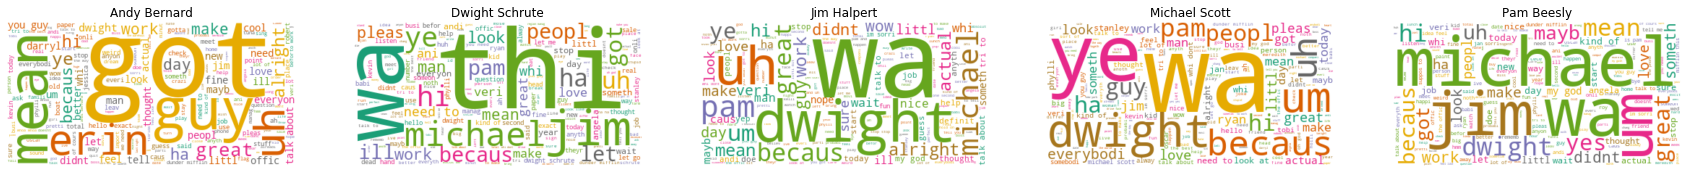

In [50]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 15]

full_names = ['Andy Bernard', 'Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly']

# Create subplots for each comedian
for index, character in enumerate(lines.columns):
    wc.generate(lines_clean.lines[character])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Number of Words


In [51]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for character in lines.columns:
    uniques = lines[character].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
lines_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['character', 'unique_words'])
lines_unique_sort = lines_words.sort_values(by='unique_words')
lines_unique_sort

,character,unique_words
0,Andy Bernard,2506
4,Pam Beesly,3085
2,Jim Halpert,3712
1,Dwight Schrute,6044
3,Michael Scott,6915


In [52]:
all_words = lines_clean.lines.apply(lambda x : len(x.split()))

all_words = pd.DataFrame(list(zip(full_names, all_words)), columns=['character', 'words'])
all_words_sort = all_words.sort_values(by='words')
all_words_sort

,character,words
0,Andy Bernard,21877
4,Pam Beesly,47345
2,Jim Halpert,62318
1,Dwight Schrute,83586
3,Michael Scott,167556


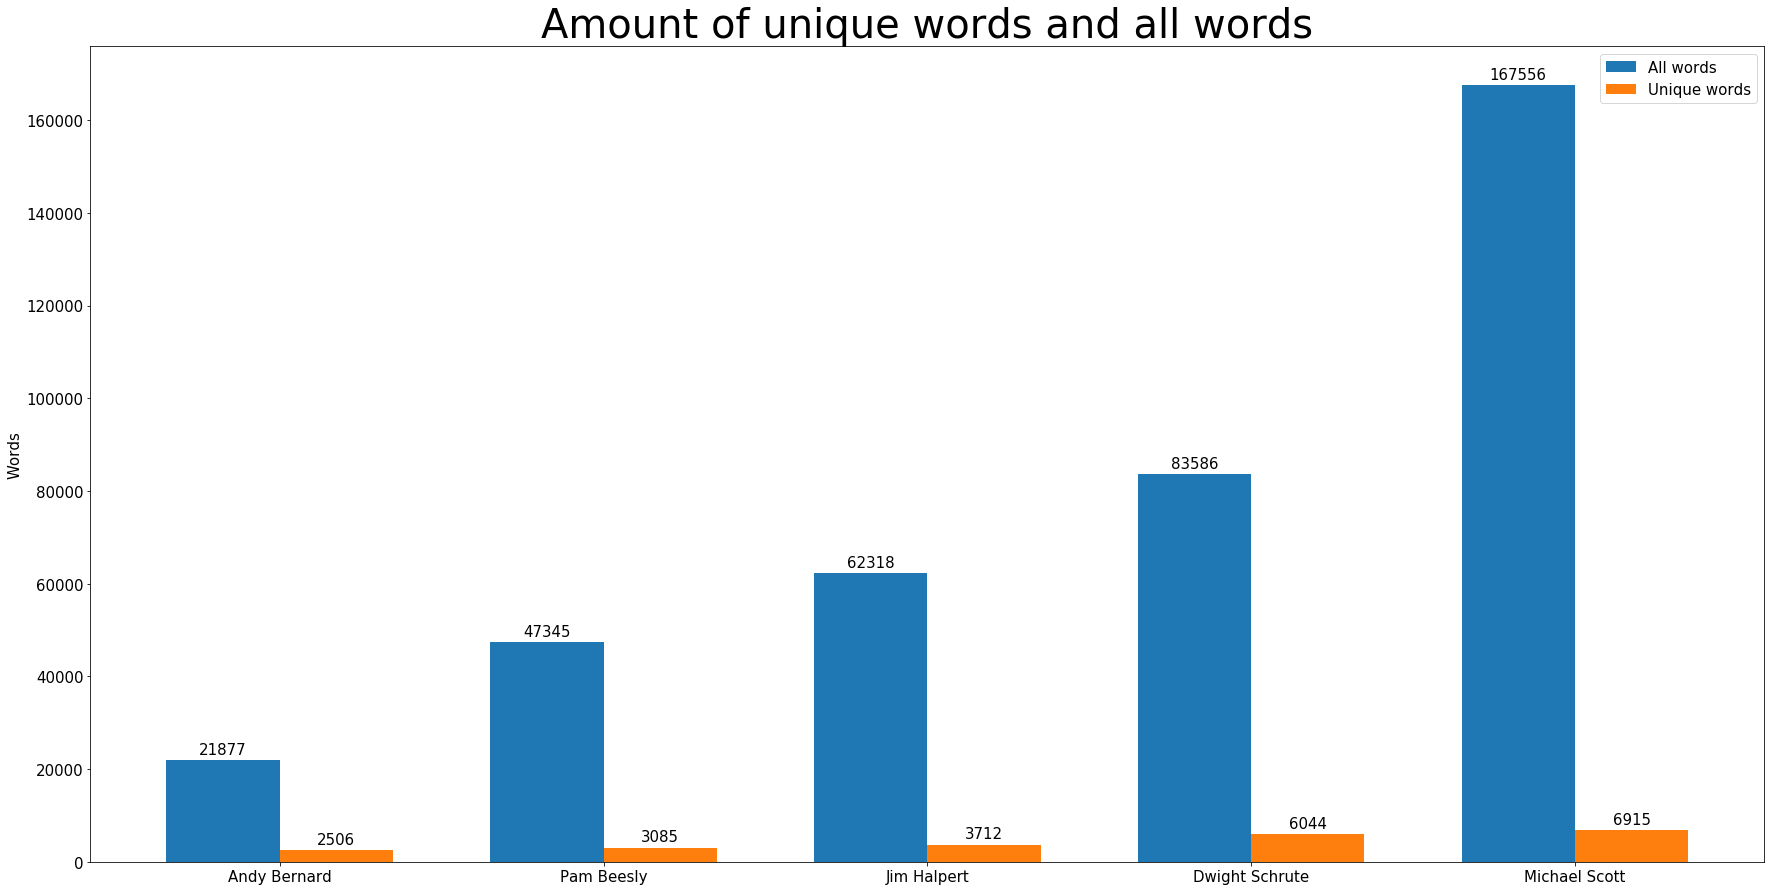

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})


labels = lines_unique_sort.character
all_means = all_words_sort.words
unq_means = lines_unique_sort.unique_words


x = np.arange(len(all_words))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, all_means, width, label='All words')
rects2 = ax.bar(x + width/2, unq_means, width, label='Unique words')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Words')
ax.set_title('Amount of unique words and all words', fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

plt.show()

We can't really conclude anything from this, as Michael Scott probably also has the most lines in the show...

### Amount of Profanity 

In [54]:
lines_bad_words = lines.transpose()[['bleep', 'bitch']]

lines_profanity = pd.concat([lines_bad_words.bleep, lines_bad_words.bitch], axis=1)
lines_profanity.columns = ['bleep', 'bitch']


In [55]:
# Let's isolate bad words in the actions
actions_bad_words = actions.transpose()[['bleep']]

actions_profanity = pd.concat([actions_bad_words.bleep], axis=1)
actions_profanity.columns = ['bleep']


In [56]:
# Profanity overall
lines_bad_words = lines.transpose()[['bleep', 'bitch']]
actions_bad_words = actions.transpose()[['bleep']]

profanity = pd.concat([lines_bad_words.bleep + actions_bad_words.bleep, lines_bad_words.bitch], axis=1)
profanity.columns = ['bleep', 'bitch']


In [57]:
prof = profanity['bleep'] + profanity['bitch']
names = []
count = []
for key, value in prof.items():
    names.append(key)
    count.append(value)


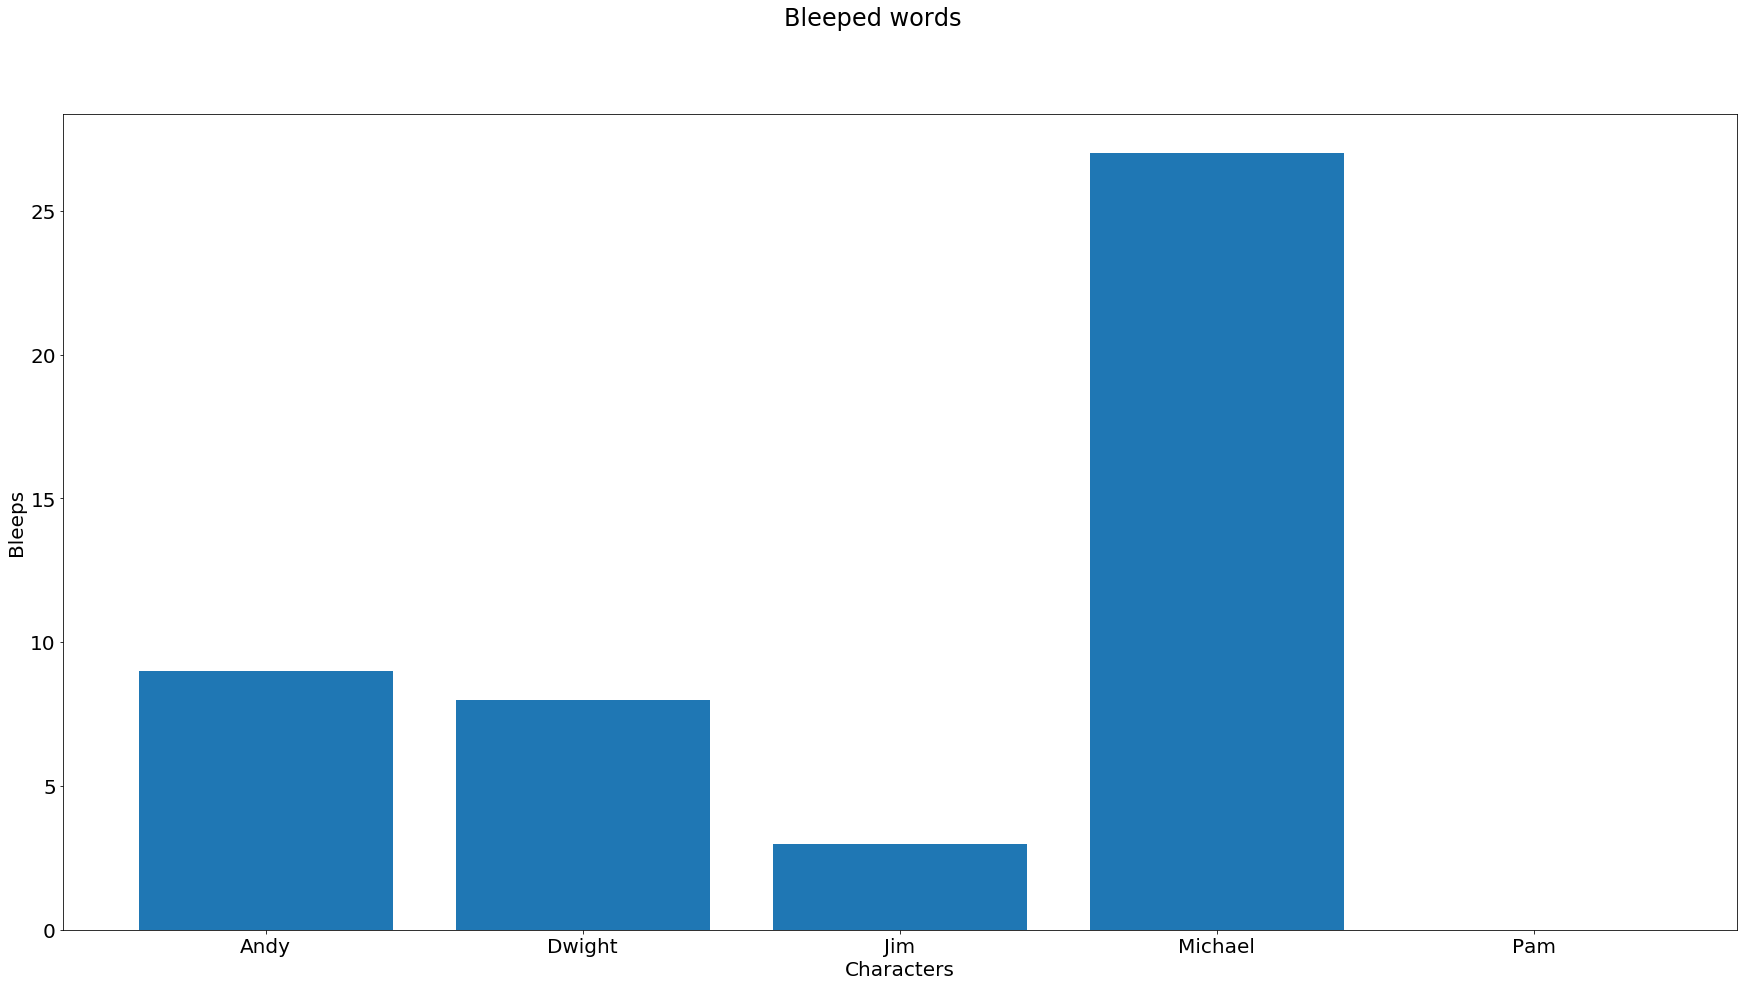

In [58]:
plt.rcParams.update({'font.size': 20})
plt.bar(names, count)
plt.suptitle('Bleeped words')
plt.xlabel('Characters')
plt.ylabel('Bleeps')
plt.show()

In [59]:
wordcount = lines_clean.lines.apply(lambda x : len(x.split()))
wordcount_pd = pd.DataFrame(list(zip(full_names, count,unique_list,  wordcount)), columns=['character','profanity', 'unique words', 'word count'])
wordcount_pd


,character,profanity,unique words,word count
0,Andy Bernard,9,2506,21877
1,Dwight Schrute,8,6044,83586
2,Jim Halpert,3,3712,62318
3,Michael Scott,27,6915,167556
4,Pam Beesly,0,3085,47345


## Sentiment Analysis
### Sentiment of Routine

In [60]:
import pandas as pd
lines = pd.read_pickle('pickle/lines_corpus.pkl')
char_names = ['Andy Bernard', 'Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly']
lines['Characters'] = char_names

lines

,lines,Characters
Andy,"Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...",Andy Bernard
Dwight,Shall I play for you? Pa rum pump um pum I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...,Dwight Schrute
Jim,"Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...",Jim Halpert
Michael,All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...,Michael Scott
Pam,"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....",Pam Beesly


In [61]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

lines['polarity'] = lines['lines'].apply(pol)
lines['subjectivity'] = lines['lines'].apply(sub)
lines

,lines,Characters,polarity,subjectivity
Andy,"Robert. I said winners and losers. Is that what youre talking about?Oh, that, it might- That might actually be what Im thinking of. Can you clarif...",Andy Bernard,0.130747,0.532648
Dwight,Shall I play for you? Pa rum pump um pum I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...,Dwight Schrute,0.141048,0.505843
Jim,"Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...",Jim Halpert,0.140890,0.529351
Michael,All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...,Michael Scott,0.167168,0.521001
Pam,"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....",Pam Beesly,0.148947,0.526456


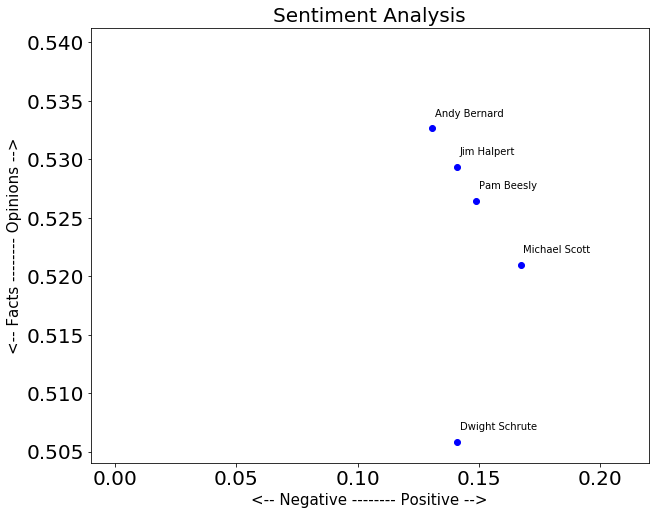

In [62]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, character in enumerate(lines.index):
    x = lines.polarity.loc[character]
    y = lines.subjectivity.loc[character]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, lines['Characters'][index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [63]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list
#lines

In [64]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in lines.lines:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [65]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
#polarity_transcript

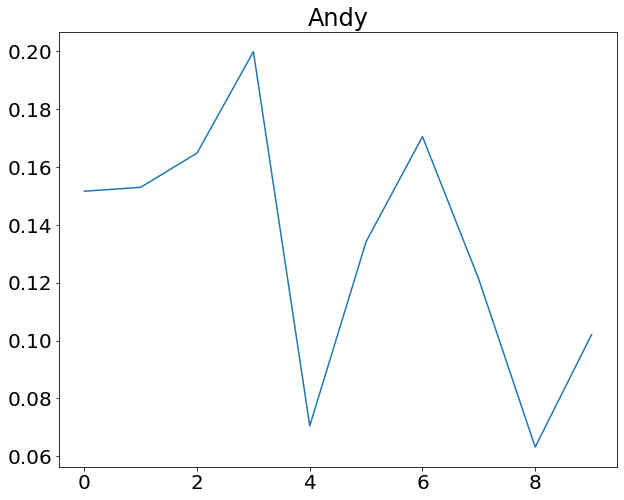

In [66]:
# Show the plot for one character
plt.plot(polarity_transcript[0])
plt.title(lines['Characters'].index[0])
plt.show()

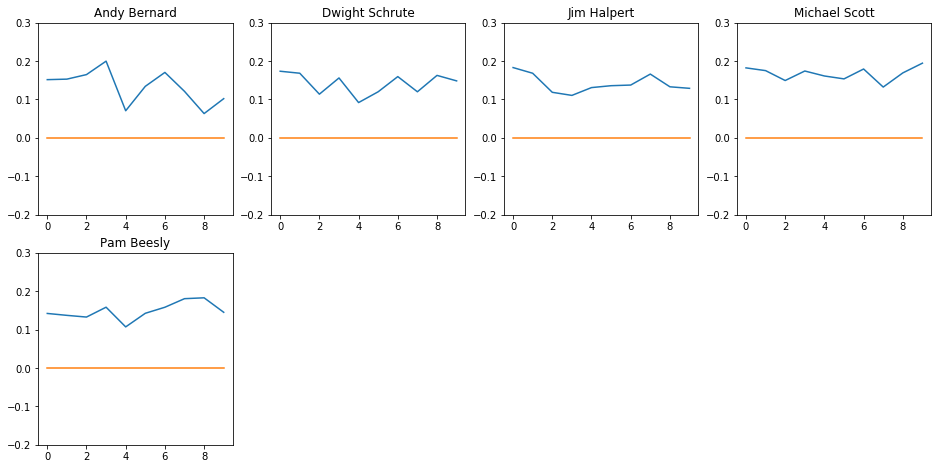

In [67]:
# Show the plot for all characters
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 10})
for index, character in enumerate(lines.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(lines['Characters'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

## Topic Modeling

In [68]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('pickle/dtm_stop.pkl')
data

,aaaaeeexcel,aandi,aaron,abandon,abbey,abbi,abbrevi,abdomen,abduct,abercrombi,...,zip,zipadeedoodaah,zit,zombi,zone,zoo,zoom,zoppiti,zoran,zuckerberg
Andy,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Dwight,0,0,0,3,0,1,1,1,0,0,...,2,0,1,4,4,3,0,0,1,1
Jim,0,1,0,1,1,2,0,0,0,0,...,1,1,0,3,1,0,0,0,0,0
Michael,1,0,1,2,0,0,0,0,2,0,...,1,0,2,1,12,1,6,2,0,0
Pam,0,0,0,2,1,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [69]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [70]:
tdm = data.transpose()
tdm.head()

,Andy,Dwight,Jim,Michael,Pam
aaaaeeexcel,0,0,0,1,0
aandi,0,0,1,0,0
aaron,1,0,0,1,0
abandon,1,3,1,2,2
abbey,0,0,1,0,1


In [71]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [72]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("pickle/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [73]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.009*"jim" + 0.008*"michael" + 0.007*"let" + 0.006*"yes" + 0.005*"need" + 0.005*"got" + 0.005*"make" + 0.005*"look" + 0.004*"work" + 0.004*"whi"'),
 (1,
  '0.008*"dwight" + 0.008*"yes" + 0.007*"let" + 0.007*"guy" + 0.007*"becaus" + 0.007*"uh" + 0.006*"michael" + 0.006*"look" + 0.006*"pam" + 0.006*"um"')]

In [74]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.009*"dwight" + 0.008*"yes" + 0.007*"let" + 0.007*"michael" + 0.007*"becaus" + 0.007*"uh" + 0.007*"pam" + 0.007*"guy" + 0.006*"look" + 0.006*"um"'),
 (1,
  '0.011*"jim" + 0.011*"michael" + 0.006*"let" + 0.005*"need" + 0.005*"got" + 0.005*"make" + 0.004*"schrute" + 0.004*"yes" + 0.004*"wait" + 0.004*"look"'),
 (2,
  '0.007*"guy" + 0.006*"yes" + 0.006*"let" + 0.006*"got" + 0.006*"need" + 0.005*"look" + 0.005*"uh" + 0.005*"work" + 0.005*"make" + 0.004*"jim"')]

In [75]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.009*"yes" + 0.008*"let" + 0.007*"becaus" + 0.007*"dwight" + 0.007*"guy" + 0.007*"look" + 0.007*"pam" + 0.006*"peopl" + 0.006*"whi" + 0.006*"need"'),
 (1,
  '0.009*"guy" + 0.007*"got" + 0.005*"need" + 0.005*"uh" + 0.005*"mean" + 0.005*"work" + 0.005*"great" + 0.005*"erin" + 0.004*"look" + 0.004*"yes"'),
 (2,
  '0.003*"let" + 0.002*"yes" + 0.002*"dwight" + 0.002*"look" + 0.002*"michael" + 0.002*"jim" + 0.002*"make" + 0.002*"whi" + 0.002*"becaus" + 0.002*"veri"'),
 (3,
  '0.012*"michael" + 0.008*"jim" + 0.008*"dwight" + 0.007*"let" + 0.006*"uh" + 0.006*"yes" + 0.006*"got" + 0.006*"look" + 0.006*"make" + 0.005*"need"')]

### Attempt 2
These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

In [76]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [77]:
# Read in the cleaned data, before the CountVectorizer step
#data_clean = pd.read_pickle('pickle/lines_clean.pkl')
data_clean = lines_clean

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(lines_clean.lines.apply(nouns))
data_nouns

In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words + newStopWords)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.lines)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

### Attempt 3

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.lines.apply(nouns_adj))
data_nouns_adj

In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.lines)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

## Identify Topics in Each Document
Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=60)
ldana.print_topics()

These topics look shit... We need to try and get some better ones.

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

# Text Generation
## Select Text to Imitate
In this notebook, we're specifically going to generate text in the style of Dwight Schrute, so as a first step, let's extract the text from his lines.

In [ ]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('pickle/lines_corpus.pkl')
data

In [ ]:
pam_text = data.lines.loc['Pam']
dwight_text = data.lines.loc['Dwight']

## Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

The keys should be all of the words in the corpus
The values should be a list of the words that follow the keys


In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Dwight's and Pam's lines
dwight_dict = markov_chain(dwight_text)
pam_dict = markov_chain(pam_text)

## Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary we just created
* The number of words we want generated


In [ ]:
import random

def generate_sentence(chain, count=10):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(dwight_dict)

###### Here are some of Dwight's generated sentences:

> 'Singing audition.I put it with some gluhwein, enjoy laughing at?Are you tell you, so doing.'

> 'Seriously? Oh, wow, Pam was not here, come in tune with Esther now. There are.'

> 'Michael! really funny, Jim! Yes. I don't care, Pam? 'Cause Ryan to enter here! To intimidate my heart. OK.'

> 'Hmmm?  You live here at a practitioner of experiencing the roast skunk. Angela? Would you.'

> 'Motivated by Weyer-Hammer Paper Incorporated. Awards, multiple Dundies. She had your office? That guy is over! Now.'

> 'And... boom.  Groin punch, hip bone! Don't.'

> 'Halpert!stop forgetting things.MR. JAMES HALPERT!Stop forgetting.'

In [ ]:
generate_sentence(pam_dict)

###### Here are some of Pam's generated lines

> 'Rule about him-- or Philadelphia.Okay.Thanks.Hi, nice meal with Ryan?Michael, you have a great time.'

> 'Dollars.you know, when they put your phone call, he is.Is it on---...noooo It's actually fire.'

> 'Terrified of his early attempts at you, but that would.'

> 'Cici has feelings too, and stuff. And on top of that.'

> 'Fast in an Office Administrator thing, besides not interested at.'